In [2]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load your dataframe here
df = pd.read_csv('taxi_2017_complete_preprocessed.csv')
df = df.drop(columns=["company", "Pickup Centroid Location", "Dropoff Centroid Location", "Unnamed: 0", "new_TaxiID", "start_census", "end_census"])
df_sample = df.sample(n=10000, random_state=1)

In [11]:
# Define the file path for the new CSV file
output_csv_path = "sampled_data.csv"

# Save the sampled data to a new CSV file
df_sample.to_csv(output_csv_path, index=False)

print(f"Sampled data saved to {output_csv_path}")

Sampled data saved to sampled_data.csv


Clustering taxi start locations with restaurant data

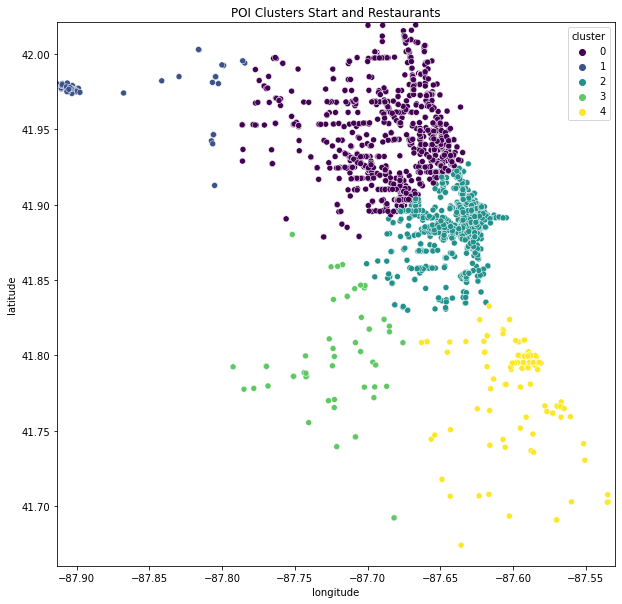

In [12]:
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs of type 'restaurant'
tags = {'amenity': 'restaurant'}
gdf = ox.features_from_place(place_name, tags)

# Filter out only the Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert the GeoDataFrame to a DataFrame and keep only the latitude and longitude
pois_df = pd.DataFrame({
    'latitude': gdf_points.geometry.y,
    'longitude': gdf_points.geometry.x
})

# Extract the start_latitude and start_longitude columns
taxi_locations = df_sample[['start_latitude', 'start_longitude']]

# Rename the columns to match the POIs DataFrame
taxi_locations.columns = ['latitude', 'longitude']

# Concatenate the taxi locations and the POIs
all_locations = pd.concat([taxi_locations, pois_df])

# Fit a KMeans model on the locations
kmeans = KMeans(n_clusters=5, random_state=0).fit(all_locations)

# Add the cluster labels to the dataframe
all_locations['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_locations, palette='viridis')

# Set the limits of the plot to the area of interest
plt.xlim([-87.913624596, -87.529950466])
plt.ylim([41.660136051, 42.021223593])

plt.title('POI Clusters Start and Restaurants')
plt.show()


In [13]:
# 1. Calculate the number of points in each cluster
cluster_counts = all_locations['cluster'].value_counts()
print("Number of points in each cluster:")
print(cluster_counts)

# 2. Calculate the centroid for each cluster
centroids = all_locations.groupby('cluster').mean()
print("\nCluster centroids (latitude, longitude):")
print(centroids)

# 3. Describe bounding box (min and max lat-long) for each cluster
bounding_boxes = all_locations.groupby('cluster').agg({
    'latitude': ['min', 'max'],
    'longitude': ['min', 'max']
})
print("\nBounding boxes for each cluster:")
print(bounding_boxes)


Number of points in each cluster:
2    8559
0    2238
1     722
3     225
4     177
Name: cluster, dtype: int64

Cluster centroids (latitude, longitude):
          latitude  longitude
cluster                      
0        41.944225 -87.674568
1        41.979125 -87.902089
2        41.886736 -87.631447
3        41.790830 -87.746969
4        41.781746 -87.595913

Bounding boxes for each cluster:
          latitude             longitude           
               min        max        min        max
cluster                                            
0        41.878594  42.019376 -87.786365 -87.634648
1        41.912788  42.003132 -87.913625 -87.784486
2        41.829922  41.927126 -87.700692 -87.604649
3        41.691957  41.880222 -87.792524 -87.675738
4        41.673820  41.832588 -87.662963 -87.534320


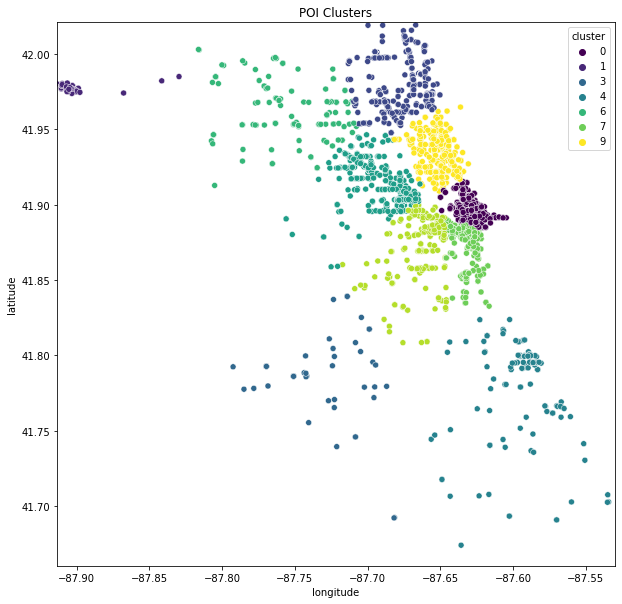

In [14]:
# Same code as before, only with more clusters
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs of type 'restaurant'
tags = {'amenity': 'restaurant'}
gdf = ox.features_from_place(place_name, tags)

# Filter out only the Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert the GeoDataFrame to a DataFrame and keep only the latitude and longitude
pois_df = pd.DataFrame({
    'latitude': gdf_points.geometry.y,
    'longitude': gdf_points.geometry.x
})

# Extract the start_latitude and start_longitude columns
taxi_locations = df_sample[['start_latitude', 'start_longitude']]

# Rename the columns to match the POIs DataFrame
taxi_locations.columns = ['latitude', 'longitude']

# Concatenate the taxi locations and the POIs
all_locations = pd.concat([taxi_locations, pois_df])

# Fit a KMeans model on the locations
kmeans = KMeans(n_clusters=10, random_state=0).fit(all_locations)

# Add the cluster labels to the dataframe
all_locations['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_locations, palette='viridis')

# Set the limits of the plot to the area of interest
plt.xlim([-87.913624596, -87.529950466])
plt.ylim([41.660136051, 42.021223593])

plt.title('POI Clusters')
plt.show()

Clustering taxi destinations with restaurant data

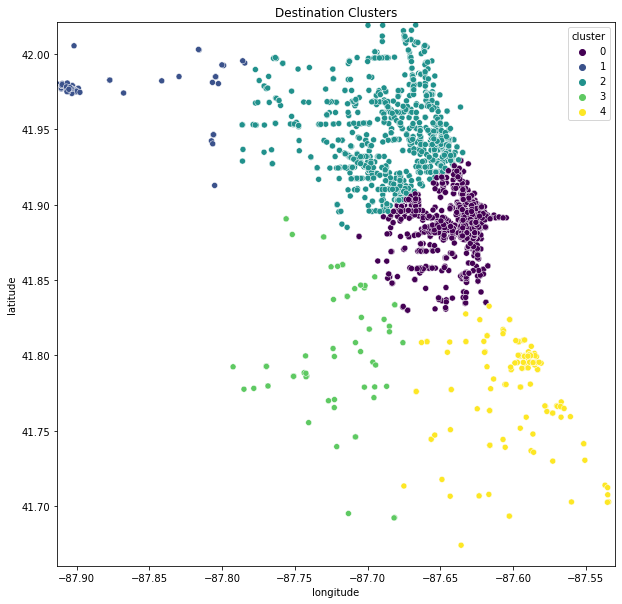

In [10]:
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs of type 'restaurant'
tags = {'amenity': 'restaurant'}
gdf = ox.features_from_place(place_name, tags)

# Filter out only the Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert the GeoDataFrame to a DataFrame and keep only the latitude and longitude
pois_df = pd.DataFrame({
    'latitude': gdf_points.geometry.y,
    'longitude': gdf_points.geometry.x
})

# Extract the end_latitude and end_longitude columns
taxi_destinations = df_sample[['end_latitude', 'end_longitude']]

# Rename the columns to match the POIs DataFrame
taxi_destinations.columns = ['latitude', 'longitude']

# Concatenate the taxi destinations and the POIs
all_destinations = pd.concat([taxi_destinations, pois_df])

# Fit a KMeans model on the destinations
kmeans = KMeans(n_clusters=5, random_state=0).fit(all_destinations)

# Add the cluster labels to the dataframe
all_destinations['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_destinations, palette='viridis')

# Set the limits of the plot to the area of interest
plt.xlim([-87.913624596, -87.529950466])
plt.ylim([41.660136051, 42.021223593])

plt.title('Destination Clusters')
plt.show()


OSM: Hospital

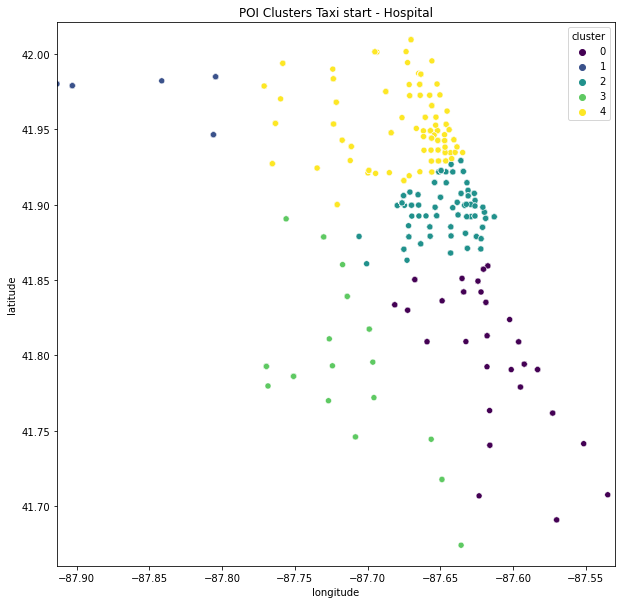

In [15]:
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs of type 'restaurant'
tags = {'amenity': 'hospital'}
gdf = ox.features_from_place(place_name, tags)

# Filter out only the Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert the GeoDataFrame to a DataFrame and keep only the latitude and longitude
pois_df = pd.DataFrame({
    'latitude': gdf_points.geometry.y,
    'longitude': gdf_points.geometry.x
})

# Extract the start_latitude and start_longitude columns
taxi_locations = df_sample[['start_latitude', 'start_longitude']]

# Rename the columns to match the POIs DataFrame
taxi_locations.columns = ['latitude', 'longitude']

# Concatenate the taxi locations and the POIs
all_locations = pd.concat([taxi_locations, pois_df])

# Fit a KMeans model on the locations
kmeans = KMeans(n_clusters=5, random_state=0).fit(all_locations)

# Add the cluster labels to the dataframe
all_locations['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_locations, palette='viridis')

# Set the limits of the plot to the area of interest
plt.xlim([-87.913624596, -87.529950466])
plt.ylim([41.660136051, 42.021223593])

plt.title('POI Clusters Taxi start - Hospital')
plt.show()

OSM: University

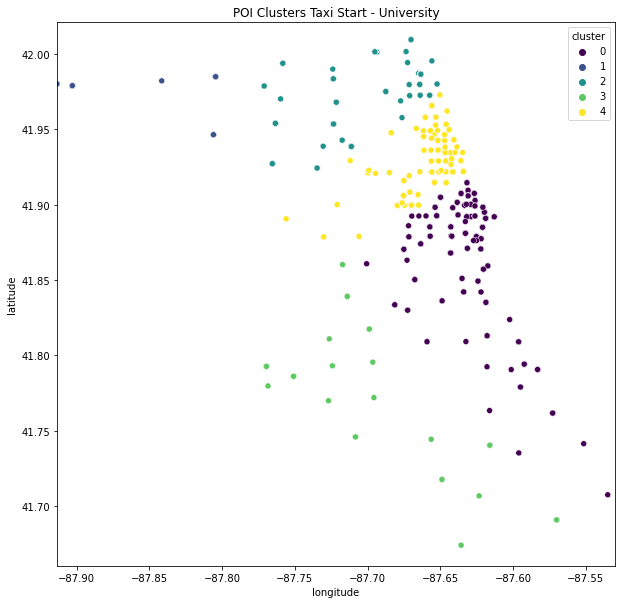

In [9]:
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs of type 'restaurant'
tags = {'amenity': 'university'}
gdf = ox.features_from_place(place_name, tags)

# Filter out only the Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert the GeoDataFrame to a DataFrame and keep only the latitude and longitude
pois_df = pd.DataFrame({
    'latitude': gdf_points.geometry.y,
    'longitude': gdf_points.geometry.x
})

# Extract the start_latitude and start_longitude columns
taxi_locations = df_sample[['start_latitude', 'start_longitude']]

# Rename the columns to match the POIs DataFrame
taxi_locations.columns = ['latitude', 'longitude']

# Concatenate the taxi locations and the POIs
all_locations = pd.concat([taxi_locations, pois_df])

# Fit a KMeans model on the locations
kmeans = KMeans(n_clusters=5, random_state=0).fit(all_locations)

# Add the cluster labels to the dataframe
all_locations['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_locations, palette='viridis')

# Set the limits of the plot to the area of interest
plt.xlim([-87.913624596, -87.529950466])
plt.ylim([41.660136051, 42.021223593])

plt.title('POI Clusters Taxi Start - University')
plt.show()

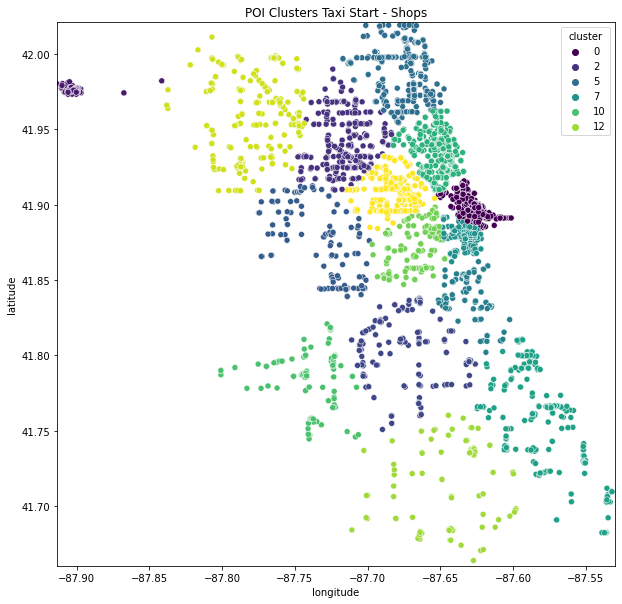

In [11]:
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs of type 'restaurant'
tags = {'shop': True, 'amenity': ['marketplace', 'mall', 'supermarket', 'convenience', 'pharmacy']}
gdf = ox.features_from_place(place_name, tags)

# Filter out only the Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert the GeoDataFrame to a DataFrame and keep only the latitude and longitude
pois_df = pd.DataFrame({
    'latitude': gdf_points.geometry.y,
    'longitude': gdf_points.geometry.x
})

# Extract the start_latitude and start_longitude columns
taxi_locations = df_sample[['start_latitude', 'start_longitude']]

# Rename the columns to match the POIs DataFrame
taxi_locations.columns = ['latitude', 'longitude']

# Concatenate the taxi locations and the POIs
all_locations = pd.concat([taxi_locations, pois_df])

# Fit a KMeans model on the locations
kmeans = KMeans(n_clusters=15, random_state=0).fit(all_locations)

# Add the cluster labels to the dataframe
all_locations['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_locations, palette='viridis')

# Set the limits of the plot to the area of interest
plt.xlim([-87.913624596, -87.529950466])
plt.ylim([41.660136051, 42.021223593])

plt.title('POI Clusters Taxi Start - Shops')
plt.show()

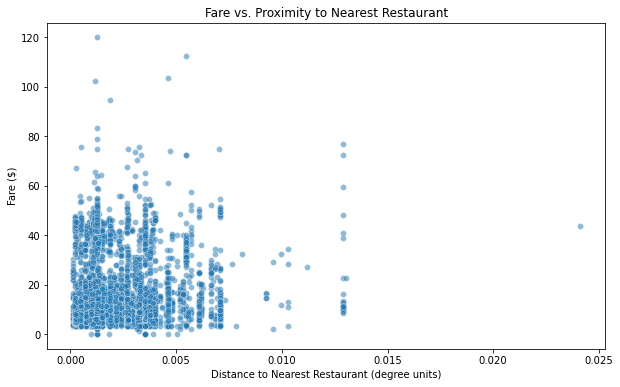

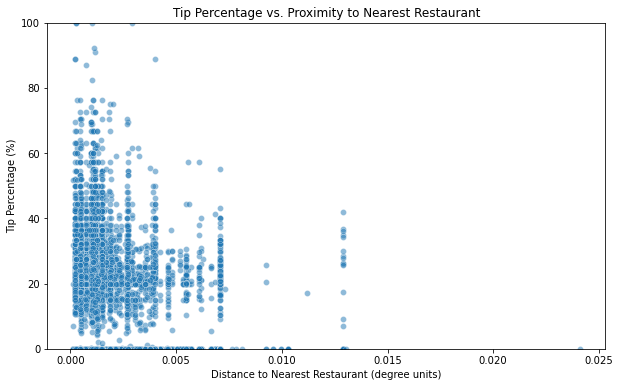

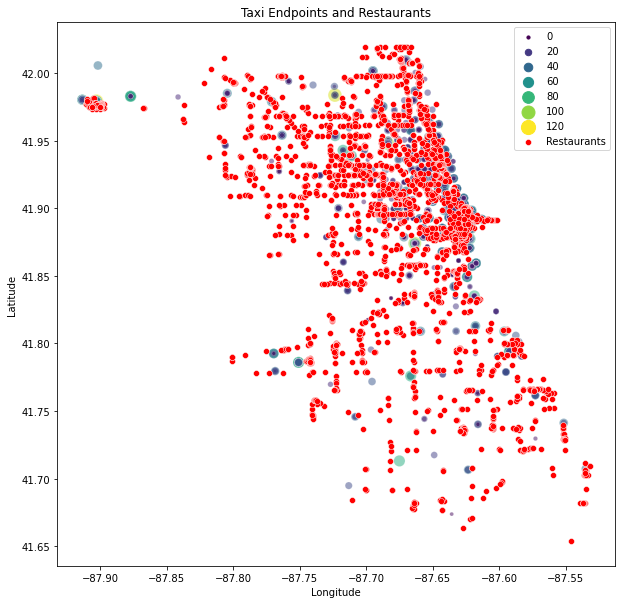

In [17]:
# Plot for the fare with respect to proximity to restaurants
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sample['nearest_restaurant_distance'], y=df_sample['fare'], alpha=0.5)
plt.title('Fare vs. Proximity to Nearest Restaurant')
plt.xlabel('Distance to Nearest Restaurant (degree units)')
plt.ylabel('Fare ($)')
plt.show()

# Distribution of tip percentage with respect to proximity to restaurants
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sample['nearest_restaurant_distance'], y=df_sample['tip_percentage'], alpha=0.5)
plt.title('Tip Percentage vs. Proximity to Nearest Restaurant')
plt.xlabel('Distance to Nearest Restaurant (degree units)')
plt.ylabel('Tip Percentage (%)')
plt.ylim(0, 100)  # set y-axis limits to [0, 100] for percentage
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x='end_longitude', y='end_latitude', data=df_sample, hue='fare', palette='viridis', size='fare', sizes=(10, 200), alpha=0.5)
sns.scatterplot(x=gdf_points.geometry.x, y=gdf_points.geometry.y, color='red', label='Restaurants')
plt.title('Taxi Endpoints and Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In this visualization, the red points represent transportation hubs. The other points (taxi destinations) are clustered and colored based on their proximity to these hubs.



In [25]:
# Specify the name of the place
place_name = "Chicago, Illinois, USA"

# Download POIs for transportation hubs: train stations, airports, and bus stations
tags = {"amenity": ["bus_station", "train_station", "aerodrome"]}
gdf_transport = ox.features_from_place(place_name, tags)


In [26]:
# Filter out only the Point geometries
gdf_transport_points = gdf_transport[gdf_transport.geometry.type == 'Point']

# Extract the latitude and longitude for these transportation hubs
transport_df = pd.DataFrame({
    'latitude': gdf_transport_points.geometry.y,
    'longitude': gdf_transport_points.geometry.x
})

# Extract the destination columns from taxi dataset
destination_locations = df[['end_latitude', 'end_longitude']]
destination_locations.columns = ['latitude', 'longitude']

# Combine the two datasets
all_locations = pd.concat([destination_locations, transport_df])

# Use KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(all_locations)
all_locations['cluster'] = kmeans.labels_


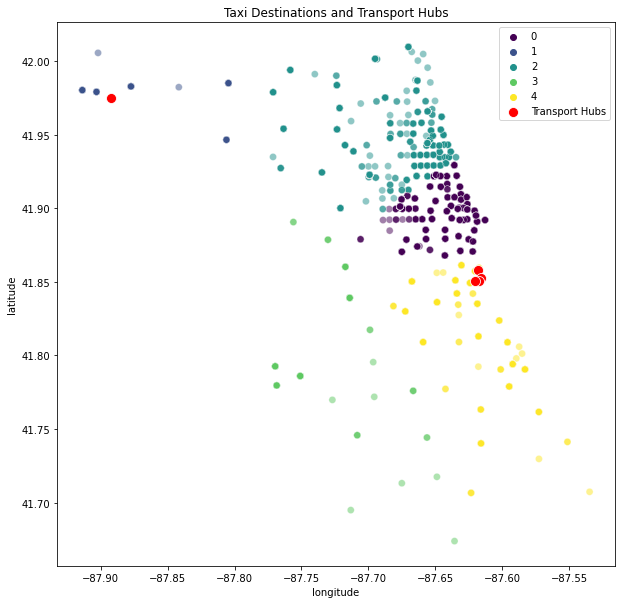

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=all_locations, palette='viridis', s=50, alpha=0.5)
sns.scatterplot(x=transport_df['longitude'], y=transport_df['latitude'], color='red', label='Transport Hubs', s=100)
plt.title('Taxi Destinations and Transport Hubs')
plt.legend()
plt.show()
